#MP4-co2 emmission

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df=pd.read_csv(r'/content/4CO2_emission.csv')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [86]:
df.isnull().sum()

,0
Model_Year,0
Make,0
Model,0
Vehicle_Class,0
Engine_Size,0
Cylinders,0
Transmission,0
Fuel_Consumption_in_City(L/100 km),0
Fuel_Consumption_in_City_Hwy(L/100 km),0
Fuel_Consumption_comb(L/100km),0


In [87]:
print(df['Vehicle_Class'].unique())

['Compact' 'Two-seater' 'SUV: Small' 'Mid-size' 'Minicompact'
 'SUV: Standard' 'Station wagon: Small' 'Subcompact'
 'Station wagon: Mid-size' 'Full-size' 'Pickup truck: Small'
 'Pickup truck: Standard' 'Minivan' 'Van: Passenger'
 'Special purpose vehicle']


In [88]:
df['Transmission'].unique()

array(['AM8', 'AM9', 'AS10', 'A8', 'A9', 'M7', 'AM7', 'AS8', 'M6', 'AS6',
       'AV', 'AS9', 'A10', 'A6', 'M5', 'AV7', 'AV1', 'AM6', 'AS7', 'AV8',
       'AV6', 'AV10', 'AS5'], dtype=object)

In [89]:
df.duplicated().sum()

np.int64(0)

In [90]:
df.shape

(935, 12)

visualization

(array([ 24., 125., 288., 250., 182.,  55.,   4.,   1.,   5.,   1.]),
 array([ 94. , 145.4, 196.8, 248.2, 299.6, 351. , 402.4, 453.8, 505.2,
        556.6, 608. ]),
 <BarContainer object of 10 artists>)

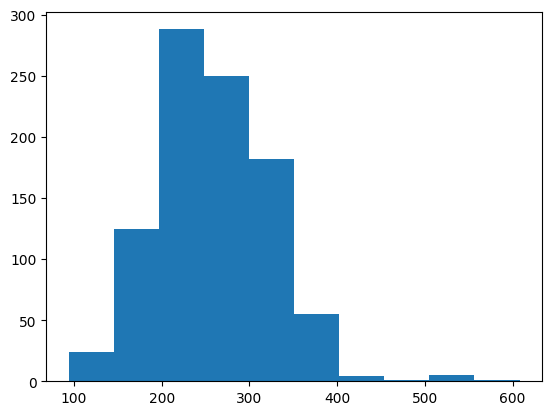

In [91]:
plt.hist(df["CO2_Emissions"])

Correlation

In [92]:
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [94]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Make'] = le.fit_transform(df['Make'])
df['Model'] = le.fit_transform(df['Model'])
df['Vehicle_Class'] = le.fit_transform(df['Vehicle_Class'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [95]:
corr_matrix=df.corr()

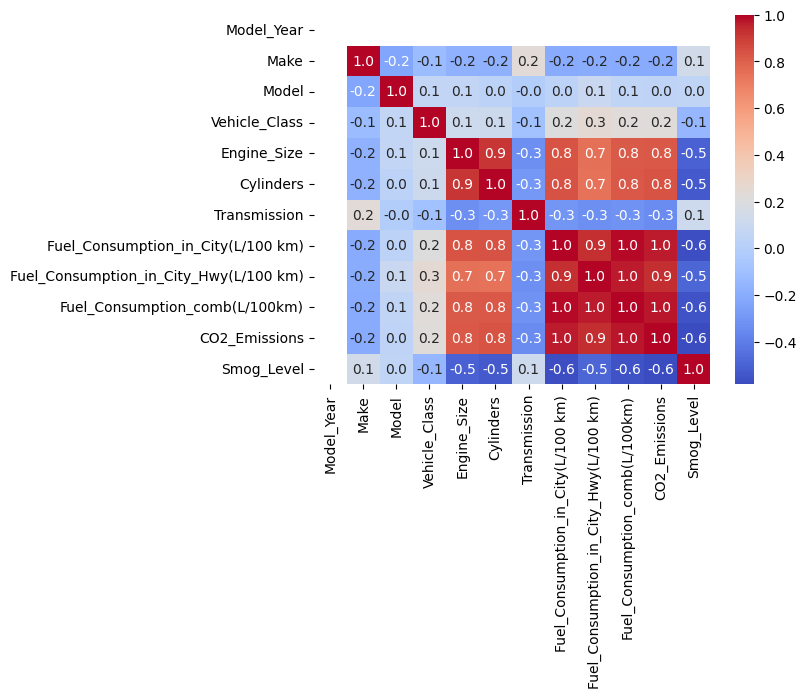

In [96]:
#heatmap
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',cmap='coolwarm')
plt.show()

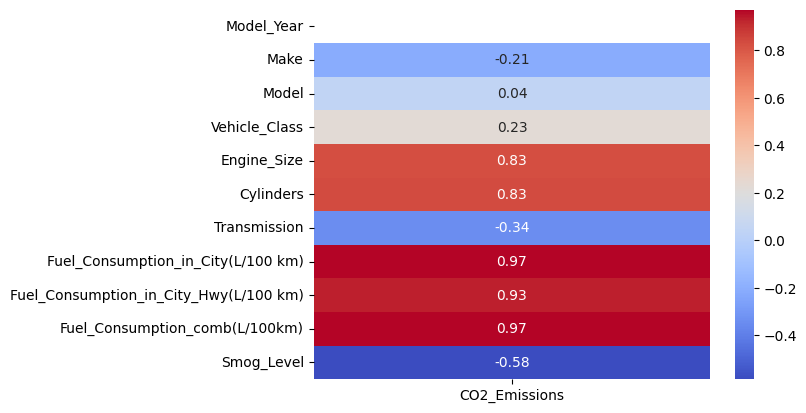

In [97]:

coe_corr = df.corr()['CO2_Emissions']

coe_corr = coe_corr.drop('CO2_Emissions')

sns.heatmap(coe_corr.to_frame(), annot=True, fmt='.2f', cmap='coolwarm',cbar=True, annot_kws={'size': 10})
plt.show()

In [98]:
df.drop(['Model','Model_Year','Fuel_Consumption_in_City(L/100 km)','Fuel_Consumption_in_City_Hwy(L/100 km)','Fuel_Consumption_comb(L/100km)'],axis=1,inplace=True)

In [99]:
#df.drop(['Make'],axis=1,inplace=True)

<Axes: >

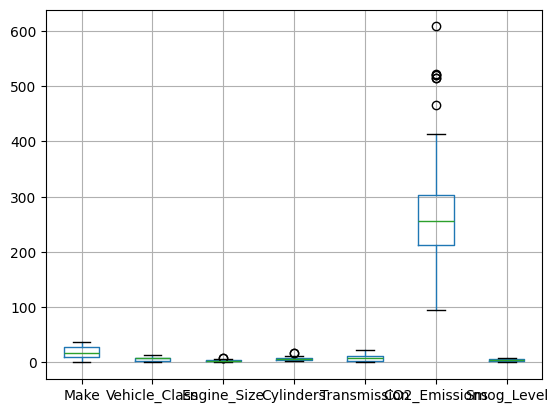

In [100]:
df.boxplot()

In [101]:
def remove_outliers_iqr(df,exclude_column):
  for col in df.columns:
    if col == exclude_column:
      continue
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR= Q3-Q1
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR

    df=df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
  return df

df_cleaned=remove_outliers_iqr(df,exclude_column='CO2_Emissions')
df=df_cleaned

In [102]:
df.shape

(933, 7)

In [103]:
df.columns

Index(['Make', 'Vehicle_Class', 'Engine_Size', 'Cylinders', 'Transmission',
       'CO2_Emissions', 'Smog_Level'],
      dtype='object')

In [104]:
from sklearn.preprocessing import MinMaxScaler

features=[ 'Make','Vehicle_Class', 'Engine_Size', 'Cylinders', 'Transmission','Smog_Level']

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[features])
scaled_df=pd.DataFrame(scaled_data, columns=features)

Prediction

In [105]:
df.head()

,Make,Vehicle_Class,Engine_Size,Cylinders,Transmission,CO2_Emissions,Smog_Level
0,0,0,2.4,4,6,199,3
1,0,13,3.5,6,7,256,3
2,0,7,2.0,4,8,232,6
3,0,7,2.0,4,8,242,6
4,0,0,2.0,4,8,230,7


In [107]:
from sklearn.linear_model import LinearRegression
X=df[[ 'Make', 'Vehicle_Class', 'Engine_Size', 'Cylinders', 'Transmission', 'Smog_Level']]
y=df['CO2_Emissions']

model=LinearRegression()
model.fit(X,y)

predicted_class=model.predict([[0, 0, 2.4, 4, 6,  3]])
print(predicted_class)

[230.11584639]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [110]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [111]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7627462826229952

Decision tree

In [112]:
target=df['CO2_Emissions']
target.head()

,CO2_Emissions
0,199
1,256
2,232
3,242
4,230


In [113]:
inputs = df[[ 'Make', 'Vehicle_Class', 'Engine_Size', 'Cylinders', 'Transmission', 'Smog_Level']]
inputs.head()

,Make,Vehicle_Class,Engine_Size,Cylinders,Transmission,Smog_Level
0,0,0,2.4,4,6,3
1,0,13,3.5,6,7,3
2,0,7,2.0,4,8,6
3,0,7,2.0,4,8,6
4,0,0,2.0,4,8,7


In [114]:
from sklearn import tree
model=tree.DecisionTreeRegressor()
model.fit(inputs,target)
model.score(inputs,target)

0.9786179454094941

In [116]:
df.head()

,Make,Vehicle_Class,Engine_Size,Cylinders,Transmission,CO2_Emissions,Smog_Level
0,0,0,2.4,4,6,199,3
1,0,13,3.5,6,7,256,3
2,0,7,2.0,4,8,232,6
3,0,7,2.0,4,8,242,6
4,0,0,2.0,4,8,230,7


In [115]:
model.predict([[0,7,2.0,4,8,6]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([237.])

SVM

In [118]:
y=df['CO2_Emissions']
x=df.drop(["CO2_Emissions"],axis="columns")

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [120]:
model=SVR()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.3157629961870947

In [121]:
model.predict(xtest)

array([225.62145667, 240.93224026, 239.44314983, 222.53667317,
       249.60404075, 219.56771543, 266.08735653, 272.19309788,
       250.96507455, 216.89419636, 245.56602328, 225.85954756,
       233.05951803, 234.21736791, 245.73749251, 255.1003625 ,
       223.82159073, 217.76726909, 229.87820536, 226.37414075,
       251.47990722, 220.10438537, 229.34748193, 255.3223754 ,
       271.72075072, 226.15230041, 234.21736791, 241.87220814,
       270.4860501 , 262.96314808, 276.26950047, 246.92318697,
       245.56602328, 263.44993623, 289.53482845, 247.15145933,
       244.80068249, 283.34569599, 237.00628915, 252.67254693,
       263.95646708, 251.02887922, 270.61943331, 253.87019065,
       255.68163592, 225.51664637, 247.75498795, 263.96194039,
       230.74901654, 258.85315337, 280.08952308, 226.57274592,
       254.4461756 , 288.64979687, 252.50738864, 280.08952308,
       254.70603426, 253.10430122, 245.56602328, 229.32081427,
       233.81498734, 263.95646708, 219.56771543, 233.05

In [132]:
#linear kernal
lin_r=SVR(kernel="linear")
lin_r.fit(xtrain,ytrain)
lin_r.score(xtest,ytest)

0.7296671479026569

In [133]:
#polynomial kernal
poly_r=SVR(kernel='poly',degree=8)
poly_r.fit(xtrain,ytrain)
poly_r.score(xtest,ytest)

0.4680694599227332

In [134]:
#gaussian kernal
gau_r=SVR(kernel ='rbf')
gau_r.fit(xtrain, ytrain)
gau_r.score(xtest, ytest)

0.30853448258979843

In [135]:
#Sigmoid Kernel
sig_r = SVR(kernel ='sigmoid')
sig_r.fit(xtrain, ytrain)
sig_r.score(xtest, ytest)

0.0703119054909801

Random Forest

In [122]:
y=df['CO2_Emissions']
x=df.drop(["CO2_Emissions"],axis="columns")

In [123]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [124]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8719624294043014

In [125]:
model.predict(xtest.head())

array([274.63316667, 229.558     , 288.44066667, 208.995     ,
       177.34716667])

In [126]:
ytest.head()

,CO2_Emissions
420,277
34,264
599,291
18,208
427,211


In [127]:
y_pred=model.predict(xtest)

In [130]:
y_pred

array([274.63316667, 229.558     , 288.44066667, 208.995     ,
       177.34716667, 210.91580952, 280.26266667, 322.28      ,
       274.38097592, 169.81      , 235.21392857, 333.62955556,
       243.38833333, 246.95016667, 274.40295238, 257.35533333,
       219.27866667, 257.45418398, 328.88      , 226.69816811,
       279.52702381, 228.55283333, 313.28593651, 326.70077417,
       197.627     , 204.98136905, 204.84566667, 309.09869048,
       273.55333333, 217.86833333, 323.56735714, 236.64283333,
       290.68220671, 307.83666667, 192.505     , 270.824     ,
       257.89533333, 209.50633333, 367.9537381 , 246.25066667,
       280.28083333, 153.76283333, 195.47333333, 236.9835    ,
       142.12      , 324.59837585, 247.42333333, 313.83156349,
       189.60799206, 349.25716667, 213.34604762, 294.79357143,
       367.9537381 , 279.52702381, 186.64288095, 282.58483333,
       200.59833333, 279.52702381, 250.8905    , 193.32533333,
       239.035     , 218.25483333, 328.88      , 310.97

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)

In [129]:
print(mae)
print(mse)

14.571068694939077
511.28577624168685
